# Projet Chlordécone aux Antilles - Volet 2 : Analyse exploratoire des données
**Auteur : Maxendre Bauthamy**

Dans ce notebook, nous exploitons la base de données nettoyée pour extraire des informations d'aide à la décision.

In [22]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from scipy import stats

# Configuration visuelle pour les graphiques
sns.set_theme(style="whitegrid")

# Chargement des données propres
df = pd.read_csv('../data/processed/BaseCLD_clean.csv')
print(f"Données chargées : {df.shape[0]}.")

Données chargées : 31098.


## 1. Analyse globale de la contamination
Regardons comment se distribue le taux de chlordécone. Selon les scientifiques, la majorité des sols sont faiblement contaminés, mais qu'il existe des "points chauds" extrêmes.

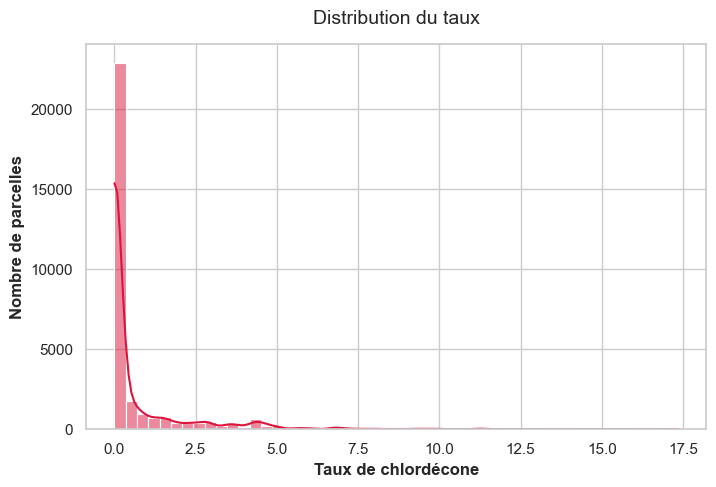

Taux moyen mesuré : 0.667 mg/kg
Taux maximum détecté : 17.350 mg/kg


In [44]:
# Taille du graphique
plt.figure(figsize=(8, 5))

# Création de l'histogramme
sns.histplot(df['Taux_Chlordecone'], bins=50, kde=True, color='crimson')

# Paramètres du graphique
plt.title("Distribution du taux", fontsize=14, pad=15)
plt.xlabel("Taux de chlordécone", weight='bold')
plt.ylabel("Nombre de parcelles", weight='bold')

# Affichage du graphique
plt.show()

# Affichage des statistiques
print(f"Taux moyen mesuré : {df['Taux_Chlordecone'].mean():.3f} mg/kg")
print(f"Taux maximum détecté : {df['Taux_Chlordecone'].max():.3f} mg/kg")

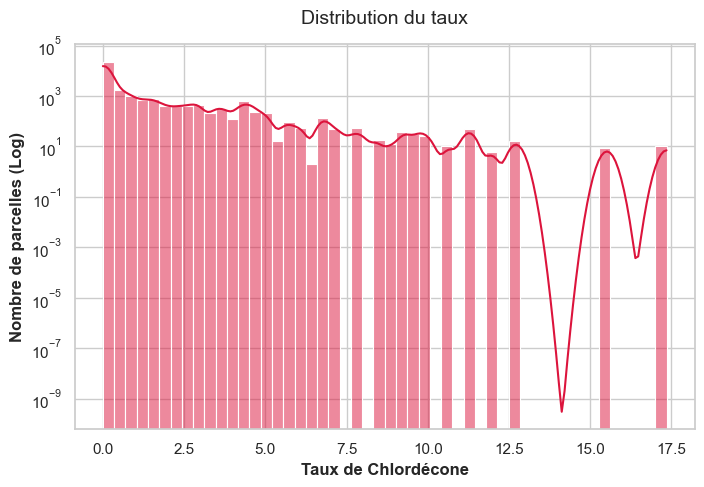

In [46]:
# Taille du graphique
plt.figure(figsize=(8, 5))

# Création de l'histogramme
sns.histplot(df['Taux_Chlordecone'], bins=50, kde=True, color='crimson')

# Mise à l'échelle logarithmique
plt.yscale('log')

# Paramètres du graphique
plt.title("Distribution du taux", fontsize=14, pad=15)
plt.xlabel("Taux de Chlordécone", weight='bold')
plt.ylabel("Nombre de parcelles (Log)", weight='bold')

# Affichage du graphique
plt.show()

**Analyse globale de la contamination**

Le premier graphique affiche la distribution brute. On observe une asymétrie extrême vers la droite : l'écrasante majorité des prélèvements présente un taux de chlordécone proche de zéro. Visuellement, l'immense barre à gauche écrase le reste du graphique, ce qui pourrait faire croire à tort que la pollution grave est quasi inexistante.

En passant l'axe des ordonnées en échelle logarithmique sur le second graphique, on compresse les grandes valeurs et on étire les petites. Cette transformation mathématique révèle la véritable structure des données. On constate qu'il existe une quantité non négligeable de parcelles fortement contaminées, s'étalant de 5 mg/kg jusqu'à des valeurs extrêmes approchant les 17.5 mg/kg.

La majorité des terres testées sont saines ou très peu impactées. Mais la présence avérée de "points chauds" très toxiques. Ce sont précisément ces parcelles, situées dans la longue traîne du graphique logarithmique, que l'État doit cibler en priorité pour interdire la culture.

## 2. Analyse temporelle
Analysons l'évolution des campagnes de prélèvements et des taux mesurés au fil des années pour observer l'impact des différents "Plans Chlordécone".

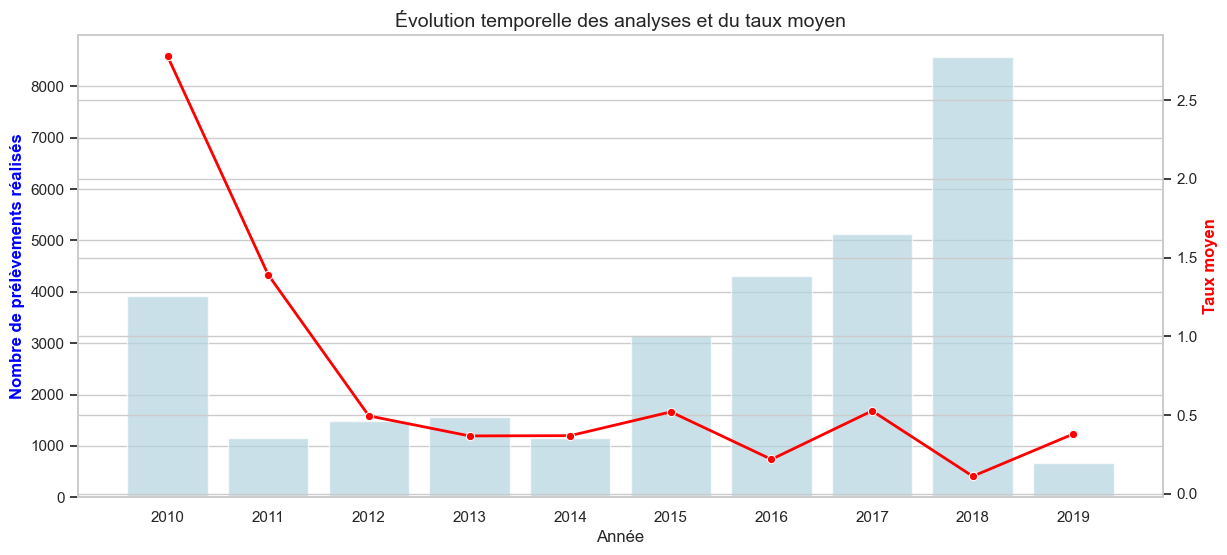

In [43]:
# Taille du graphique
plt.figure(figsize=(14, 6))

# Agrégation des données
evolution_annuelle = df.groupby('ANNEE').agg(
    Nb_Prelevements=('ID', 'count'),
    Taux_Moyen=('Taux_Chlordecone', 'mean')
).reset_index()

# Création du premier axe
ax1 = sns.barplot(data=evolution_annuelle, x='ANNEE', y='Nb_Prelevements', color='lightblue', alpha=0.7)
ax1.set_ylabel("Nombre de prélèvements réalisés", color='blue', weight='bold')
ax1.set_xlabel("Année")

# Création du deuxième axe
ax2 = ax1.twinx()
sns.lineplot(data=evolution_annuelle, x=np.arange(len(evolution_annuelle)), y='Taux_Moyen', 
             color='red', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel("Taux moyen", color='red', weight='bold')

# Paramètres du graphique
plt.title("Évolution temporelle des analyses et du taux moyen", fontsize=14)

# Affichage du graphique
plt.show()

**Analyse temporelle**

Observations :
On note une très forte variabilité des campagnes de prélèvements, avec une montée en puissance à partir de 2015 jusqu'à un pic massif en 2018 (plus de 8000 prélèvements sur une seule année).
Le taux moyen démarre à un niveau critique en 2010 (plus de 2.5 mg/kg en moyenne), chute en 2011-2012, puis se stabilise à un niveau plus bas les années suivantes.

Interprétation :
La chute de la courbe rouge ne signifie  pas que la chlordécone a disparu des sols. Nous savons que cette molécule est ultra-persistante. Ce que ce graphique montre, c'est un changement de stratégie de prélèvement.
En 2010, les autorités ont probablement ciblé en priorité les "points chauds" historiques (les anciennes bananeraies connues pour être très polluées), donc la moyenne est mathématiquement très haute.
En 2018, les autorités ont lancé une campagne de cartographie massive (8000 prélèvements), ratissant beaucoup plus large sur le territoire, y compris dans des zones saines ou peu impactées. L'intégration de tous ces sols sains a faussée la moyenne globale vers le bas.

Ce graphique n'illustre pas la dépollution de l'île, mais retrace l'historique des financements et des politiques de contrôle.

## 3. Facteurs agronomiques et topographiques
Nous cherchons à savoir si le type de sol et le relief favorisent la rétention de la chlordecone.

C:\Users\maxba\AppData\Local\Temp\ipykernel_82832\1960191998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sols, x='Sol_simple', y='Taux_Chlordecone', palette='Set2')


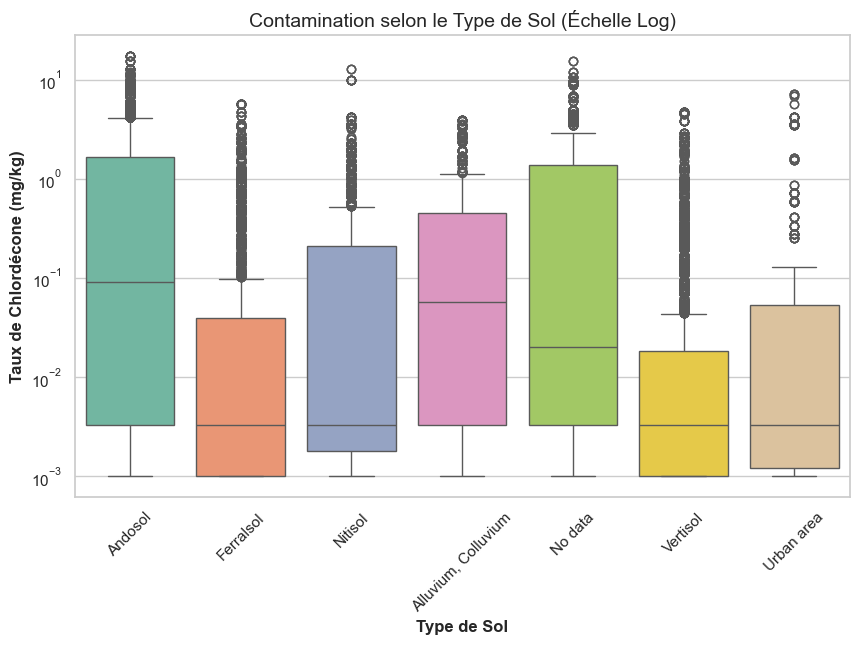

In [ ]:
# Taille du graphique
plt.figure(figsize=(10, 6))

# Nettoyage des sols "INCONNU"
df_sols = df[df['Sol_simple'] != 'INCONNU'].copy()

# Création du Boxplot
sns.boxplot(data=df_sols, x='Sol_simple', y='Taux_Chlordecone', palette='Set2')

# Mise à l'échelle logarithmique
plt.yscale('log')

# Paramètres du graphique
plt.title("Contamination selon le type de sol (Log)", fontsize=14)
plt.xlabel("Type de sol", weight='bold')
plt.ylabel("Taux de chlordécone", weight='bold')
plt.xticks(rotation=45)

# Affichage du graphique
plt.show()

**Interprétation : Analyse type de sol**

L'échelle logarithmique nous permet de comparer clairement les médianes de chaque type de terre. On remarque que la boîte des Andosols est située plus haut que les autres.

Les Andosols, qui sont des sols d'origine volcanique très présents aux Antilles, agissent comme de véritables éponges. Leurs propriétés physico-chimiques emprisonnent la molécule de chlordécone, la rendant extrêmement persistante. À l'inverse, les Ferralsols retiennent beaucoup moins la pollution.

Les parcelles situées sur des Andosols doivent faire l'objet d'une vigilance maximale et d'interdictions de cultures de légumes-racines beaucoup plus strictes.

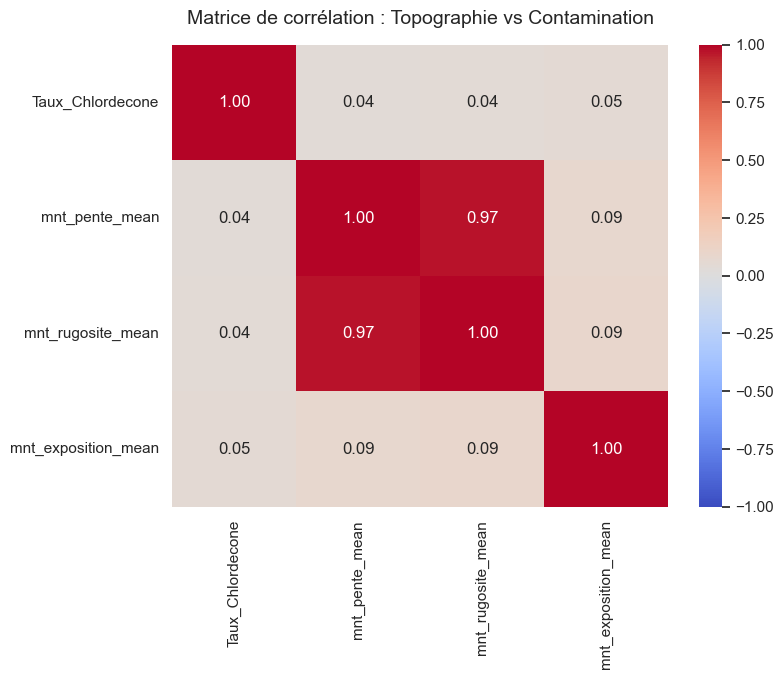

In [42]:
# Sélection des variables à comparer
colonnes_topo = ['Taux_Chlordecone', 'mnt_pente_mean', 'mnt_rugosite_mean', 'mnt_exposition_mean']

# Calcul de la matrice de corrélation
matrice_corr = df[colonnes_topo].corr()

# Taille du graphique
plt.figure(figsize=(8, 6))

# Création de la Heatmap
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

# Paramètres du graphique
plt.title("Matrice de corrélation : Topographie vs Contamination", fontsize=14, pad=15)

# Affichage du graphique
plt.show()

**Interprétation : Analyse topographique**

Cette matrice mesure la force du lien mathématique (de -1 à 1) entre la pollution et le relief du terrain. On constate que la corrélation entre le "Taux_Chlordecone" et la pente ou la rugosité est quasi nulle (0.04). 

Contrairement à ce qu'on pourrait penser, le fait qu'un terrain soit pentu ou plat n'a pas d'impact direct sur son niveau de pollution. La gravité et le ruissellement ne suffisent pas à expliquer la répartition de la molécule.

La pollution n'est pas dictée par le relief, mais par l'historique de l'activité humaine (les plantations des bananes) combiné à la nature du sol.

## 4. Analyse pluviométrique
La molécule de chlordécone est-elle moins présente à cause des fortes pluies ? Croisons la variable `RAIN` avec le taux de pollution.

C:\Users\maxba\AppData\Local\Temp\ipykernel_82832\2163267992.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rain, x='RAIN', y='Taux_Chlordecone', order=ordre_pluie, palette='Blues')


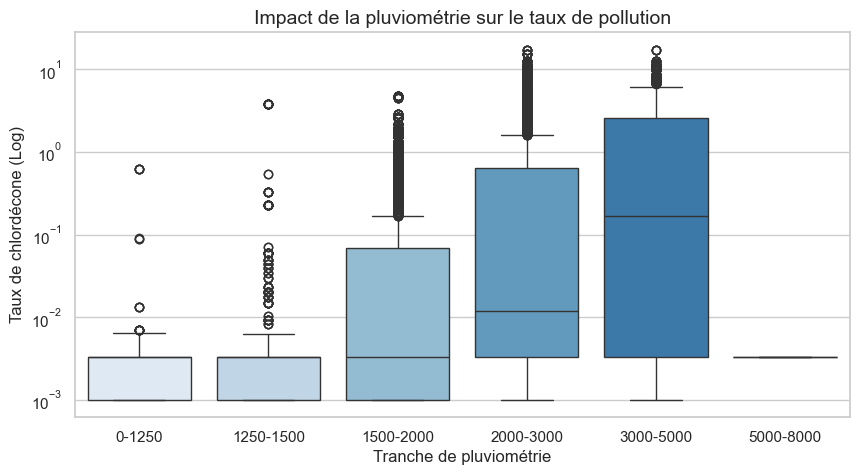

In [ ]:
# Taille du graphique
plt.figure(figsize=(10, 5))

# Création de variables
df_rain = df.dropna(subset=['RAIN']).copy()
ordre_pluie = sorted(df_rain['RAIN'].unique().astype(str))

# Création du Boxplot
sns.boxplot(data=df_rain, x='RAIN', y='Taux_Chlordecone', order=ordre_pluie, palette='Blues')

# Mise à l'échelle logarithmique
plt.yscale('log')

# Paramètres du graphique
plt.title("Impact de la pluviométrie sur le taux de pollution", fontsize=14)
plt.xlabel("Tranche de pluviométrie")
plt.ylabel("Taux de chlordécone (Log)")

# Affichage du graphique
plt.show()

**Interprétation : Pluviométrie**

Le niveau de pollution reste élevé malgré la pluie, cela prouve que cette molécule est résistante. Elle reste fermement dans la terre, même après de très fortes pluies.

Si la pluie ne nettoie pas les sols, on ne peut pas compter sur la nature pour régler le problème avec le temps. Les restrictions agricoles doivent rester strictes même dans les régions très pluvieuses.

## 5. Cartographie des zones à risques
Afin de créer une carte intéractive, nous convertissons les coordonnées projetées en coordonnées GPS pour cartographier les prélèvements dépassant le seuil critique.

In [39]:
# Conversion spatiale
df_geo = df.dropna(subset=['X', 'Y']).copy()
gdf = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo['X'], df_geo['Y']), crs="EPSG:32620")
gdf = gdf.to_crs("EPSG:4326")
gdf['Longitude'] = gdf.geometry.x
gdf['Latitude'] = gdf.geometry.y

# Création de la carte
centre_lat, centre_lon = gdf['Latitude'].mean(), gdf['Longitude'].mean()
m = folium.Map(location=[centre_lat, centre_lon], zoom_start=11, tiles='cartodbpositron')

# Filtre sur les zones critiques
gdf_critique = gdf[gdf['Taux_Chlordecone'] > 1.0].head(1000)

# Points de chaque ligne sur la carte
for idx, row in gdf_critique.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4, color='darkred', fill=True, fill_color='red', fill_opacity=0.7,
        popup=f"Commune: {row['COMMU_LAB']}<br>Taux: {row['Taux_Chlordecone']:.2f}<br>Sol: {row['Sol_simple']}"
    ).add_to(m)

# Affichage de la carte
display(m)

## 6. Conclusion générale et recommandations

Au terme de cette analyse des données, le croisement des données chimiques, spatiales, temporelles et agronomiques nous permet de tirer des conclusions claires sur la dynamique de la chlordécone aux Antilles :

### Synthèse des insights :
1. Une pollution asymétrique mais persistante : L'écrasante majorité des terres testées présente des taux faibles ou nuls. Cependant, il existe un grand nombre de points chauds extrêmement toxiques.
2. Le piège des statistiques temporelles : La baisse du taux moyen mesuré lors des récentes années n'est pas le signe d'une dépollution naturelle, mais résulte d'un biais d'échantillonnage (les campagnes récentes ont ratissé plus large, incluant davantage de zones saines).
3. L'effet éponge des sols volcaniques : La nature du sol dicte le niveau de danger. Les "Andosols" (sols riches en allophane) gardent la molécule.
4. L'inefficacité du nettoyage naturel : Ni la pente du terrain (relief), ni les pluies ne parviennent à laver les sols pollués.

### Recommandations :
Grâce à la cartographie interactive générée dans ce projet, voici des exemples de recommandations :
* Zonage strict et ciblé : Maintenir et renforcer l'interdiction stricte de culture de légumes-racines exclusivement sur les polygones identifiés comme "Andosols" situés dans les zones rouges.
* Accompagnement ciblé : Débloquer des aides financières spécifiques pour aider les exploitants situés sur ces "points chauds" à financer leur transition vers des cultures aériennes (bananes, vergers) ou hors-sol, où le risque de transfert de la chlordécone de la terre vers le fruit est quasi nul.